In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Прогнозирование стоимости страховки	
https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction

Набор данных по медицинскому страхованию содержит информацию о ряде факторов, которые могут повлиять на медицинские расходы, включая возраст, пол, ИМТ, статус курящего, количество детей и регион. Этот набор данных может быть использован для обучения модели машинного обучения, которая может прогнозировать медицинские расходы для новых клиентов.

In [24]:
df1 = pd.read_csv("..//static//csv//Medical_insurance.csv")

print(df1.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


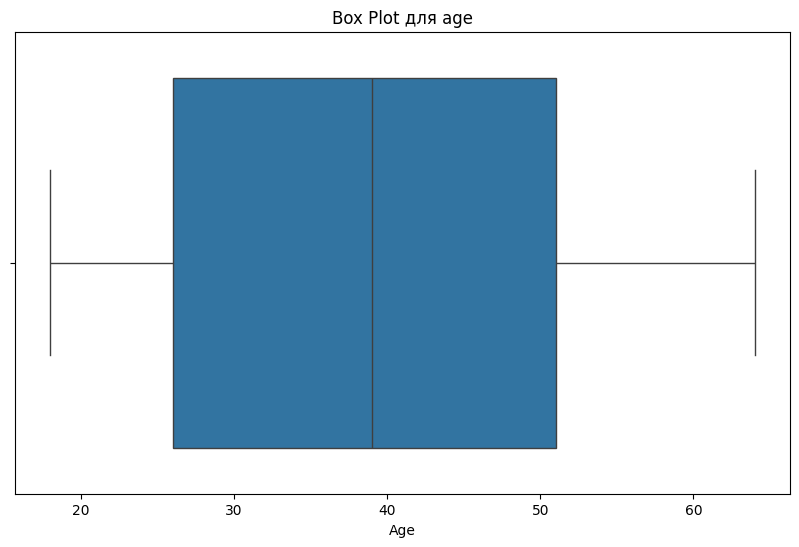

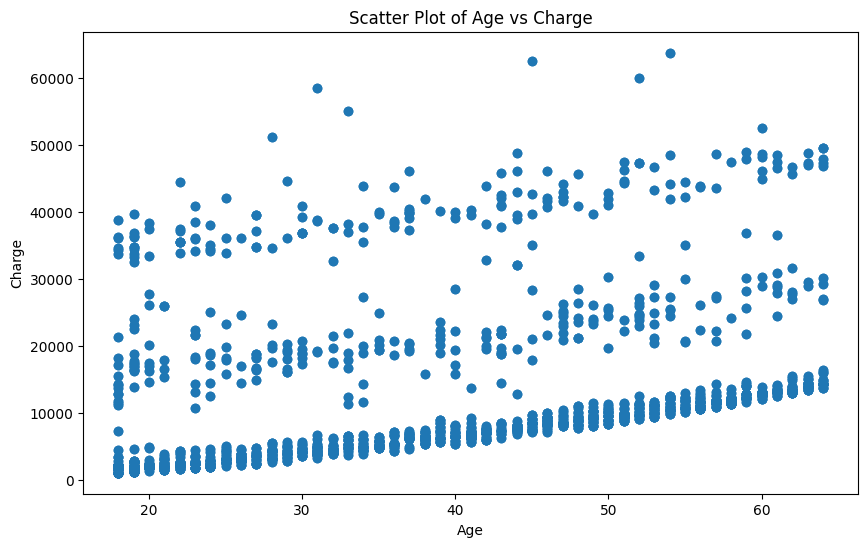

In [25]:
# Визуализация данных - ящик с усами. Выборка относительно сбалансированна, пускай и смещена в меньшую сторону. Пустых значений нет.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1["age"])
plt.title("Box Plot для age")
plt.xlabel("Age")
plt.show()

#Визуализируем отношение стоимости и возраста
plt.figure(figsize=(10, 6))
plt.scatter(df1["age"], df1["charges"])
plt.xlabel('Age')
plt.ylabel("Charge")
plt.title('Scatter Plot of Age vs Charge')
plt.show()

Выбросы:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


C:\Users\Admin\AppData\Local\Temp\ipykernel_8452\3242078583.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[outliers])


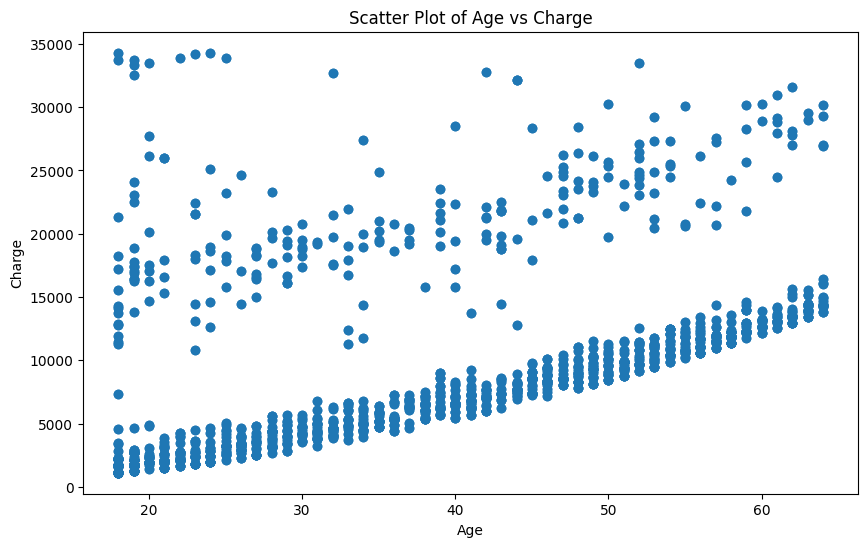

In [26]:
# Есть шумы, убираем

# Статистический анализ для определения выбросов
Q1 = df1["charges"].quantile(0.25)
Q3 = df1["charges"].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df1["charges"] < (Q1 - threshold)) | (df1["charges"] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_charge = df1["charges"].median()
df1.loc[outliers, "charges"] = 0
df1 = df1[df1.charges != 0]

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df1["age"], df1["charges"])
plt.xlabel("Age")
plt.ylabel("Charge")
plt.title("Scatter Plot of Age vs Charge")
plt.show()

In [32]:
#Разбиение набора данных на обучающую, контрольную и тестовую выборки

train_df1, temp_df1 = train_test_split(df1, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df1, test_df1 = train_test_split(temp_df1, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df1))
print("Размер контрольной выборки:", len(val_df1))
print("Размер тестовой выборки:", len(test_df1))

# Сохранение выборок в файлы
train_df1.to_csv("..//static//csv//train_data.csv", index=False)
val_df1.to_csv("..//static//csv//val_data.csv", index=False)
test_df1.to_csv("..//static//csv//test_data.csv", index=False)


Размер обучающей выборки: 1485
Размер контрольной выборки: 495
Размер тестовой выборки: 496


In [34]:
#Проанализируем сбалансированность выборок
train_df1 = pd.read_csv("..//static//csv//train_data.csv")
val_df1 = pd.read_csv("..//static//csv//val_data.csv")
test_df1 = pd.read_csv("..//static//csv//test_data.csv")

# Оценка сбалансированности
def check_balance(df1, name):
    counts = df1['sex'].value_counts()
    print(f"Распределение Review_type в {name}:")
    print(counts)
    print(f"Процент мужчин: {counts['male'] / len(df1) * 100:.2f}%")
    print(f"Процент женщин: {counts['female'] / len(df1) * 100:.2f}%")
    print()

# Определение необходимости аугментации данных
def need_augmentation(df1):
    counts = df1['sex'].value_counts()
    ratio = counts['male'] / counts['female']
    if ratio > 1.5 or ratio < 0.67:
        print("Необходима аугментация данных для балансировки классов.")
    else:
        print("Аугментация данных не требуется.")
        
check_balance(train_df1, "обучающей выборке")
check_balance(val_df1, "контрольной выборке")
check_balance(test_df1, "тестовой выборке")



need_augmentation(train_df1)
need_augmentation(val_df1)
need_augmentation(test_df1)

Распределение Review_type в обучающей выборке:
sex
female    765
male      720
Name: count, dtype: int64
Процент мужчин: 48.48%
Процент женщин: 51.52%

Распределение Review_type в контрольной выборке:
sex
male      257
female    238
Name: count, dtype: int64
Процент мужчин: 51.92%
Процент женщин: 48.08%

Распределение Review_type в тестовой выборке:
sex
female    259
male      237
Name: count, dtype: int64
Процент мужчин: 47.78%
Процент женщин: 52.22%

Аугментация данных не требуется.
Аугментация данных не требуется.
Аугментация данных не требуется.


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Загрузка данных
train_df1 = pd.read_csv("..//static//csv//train_data.csv")
val_df1 = pd.read_csv("..//static//csv//val_data.csv")
test_df1 = pd.read_csv("..//static//csv//test_data.csv")

# Преобразование категориальных признаков в числовые
def encode(df1):
    label_encoders = {}
    for column in df1.select_dtypes(include=['object']).columns:
        if column != 'sex':  # Пропускаем целевую переменную
            le = LabelEncoder()
            df1[column] = le.fit_transform(df1[column])
            label_encoders[column] = le
    return label_encoders

# Преобразование целевой переменной в числовые значения
def encode_target(df1):
    le = LabelEncoder()
    df1['sex'] = le.fit_transform(df1['sex'])
    return le

# Применение кодирования
label_encoders = encode(train_df1)
encode(val_df1)
encode(test_df1)

# Кодирование целевой переменной
le_target = encode_target(train_df1)
encode_target(val_df1)
encode_target(test_df1)

# Проверка типов данных
def check_data_types(df1):
    for column in df1.columns:
        if df1[column].dtype == 'object':
            print(f"Столбец '{column}' содержит строковые данные.")

check_data_types(train_df1)
check_data_types(val_df1)
check_data_types(test_df1)

# Функция для выполнения oversampling
def oversample(df1):
    if 'sex' not in df1.columns:
        print("Столбец 'sex' отсутствует.")
        return df1
    
    X = df1.drop('sex', axis=1)
    y = df1['sex']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df1 = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df1

# Функция для выполнения undersampling
def undersample(df1):
    if 'sex' not in df1.columns:
        print("Столбец 'sex' отсутствует.")
        return df1
    
    X = df1.drop('sex', axis=1)
    y = df1['sex']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df1 = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df1

# Применение oversampling и undersampling к каждой выборке
train_df1_oversampled = oversample(train_df1)
val_df1_oversampled = oversample(val_df1)
test_df1_oversampled = oversample(test_df1)

train_df1_undersampled = undersample(train_df1)
val_df1_undersampled = undersample(val_df1)
test_df1_undersampled = undersample(test_df1)

# Обратное преобразование целевой переменной в строковые метки
def decode_target(df1, le_target):
    df1['sex'] = le_target.inverse_transform(df1['sex'])

decode_target(train_df1_oversampled, le_target)
decode_target(val_df1_oversampled, le_target)
decode_target(test_df1_oversampled, le_target)

decode_target(train_df1_undersampled, le_target)
decode_target(val_df1_undersampled, le_target)
decode_target(test_df1_undersampled, le_target)

# Проверка результатов
def check_balance(df1, name):
    if 'sex' not in df1.columns:
        print(f"Столбец 'sex' отсутствует в {name}.")
        return
    
    counts = df1['sex'].value_counts()
    print(f"Распределение sex в {name}:")
    print(counts)
    
    if 'male' in counts and 'female' in counts:
        print(f"Процент мужчин: {counts['male'] / len(df1) * 100:.2f}%")
        print(f"Процент женщин: {counts['female'] / len(df1) * 100:.2f}%")
    else:
        print("Отсутствуют один или оба класса (male/female).")
    print()

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df1_oversampled, "обучающей выборке")
check_balance(val_df1_oversampled, "контрольной выборке")
check_balance(test_df1_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df1_undersampled, "обучающей выборке")
check_balance(val_df1_undersampled, "контрольной выборке")
check_balance(test_df1_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение sex в обучающей выборке:
sex
male      765
female    765
Name: count, dtype: int64
Процент мужчин: 50.00%
Процент женщин: 50.00%

Распределение sex в контрольной выборке:
sex
male      257
female    257
Name: count, dtype: int64
Процент мужчин: 50.00%
Процент женщин: 50.00%

Распределение sex в тестовой выборке:
sex
female    259
male      259
Name: count, dtype: int64
Процент мужчин: 50.00%
Процент женщин: 50.00%

Андерсэмплинг:
Распределение sex в обучающей выборке:
sex
female    720
male      720
Name: count, dtype: int64
Процент мужчин: 50.00%
Процент женщин: 50.00%

Распределение sex в контрольной выборке:
sex
female    238
male      238
Name: count, dtype: int64
Процент мужчин: 50.00%
Процент женщин: 50.00%

Распределение sex в тестовой выборке:
sex
female    237
male      237
Name: count, dtype: int64
Процент мужчин: 50.00%
Процент женщин: 50.00%



## Объекты вокруг Земли	
https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

В космическом пространстве существует бесконечное количество объектов. Некоторые из них находятся ближе, чем мы думаем. Хотя нам может казаться, что расстояние в 70 000 км не может причинить нам вред, в астрономическом масштабе это очень маленькое расстояние, которое может нарушить многие природные явления. Таким образом, эти объекты/астероиды могут причинить вред. Поэтому разумно знать, что нас окружает и что может причинить нам вред. Таким образом, этот набор данных содержит список сертифицированных НАСА астероидов, которые классифицируются как ближайшие к Земле объекты.

In [44]:
df2 = pd.read_csv("..//static//csv//neo.csv")

print(df2.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


In [45]:
#Получение сведений о пропущенных данных

# Количество пустых значений признаков
print(df2.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df2.isnull().any())

print()

# Процент пустых значений признаков
for i in df2.columns:
    null_rate = df2[i].isnull().sum() / len(df2) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool



Итог: пропущеных значений нет

Инфографика на сайте и в datawrangelere показывает, что в столбцах orbiting_body и sentry_object у всех записей одно и тоже значение. Значит эти столбцы можно выкинуть из набора данных.

In [46]:
df2 = df2.drop(columns=['orbiting_body'])
df2 = df2.drop(columns=['sentry_object'])
print('количество колонок: ' + str(df2.columns.size))  
print('колонки: ' + ', '.join(df2.columns))

количество колонок: 8
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, absolute_magnitude, hazardous


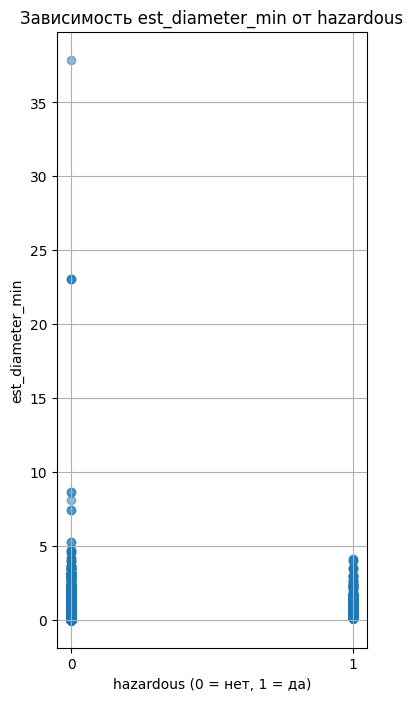

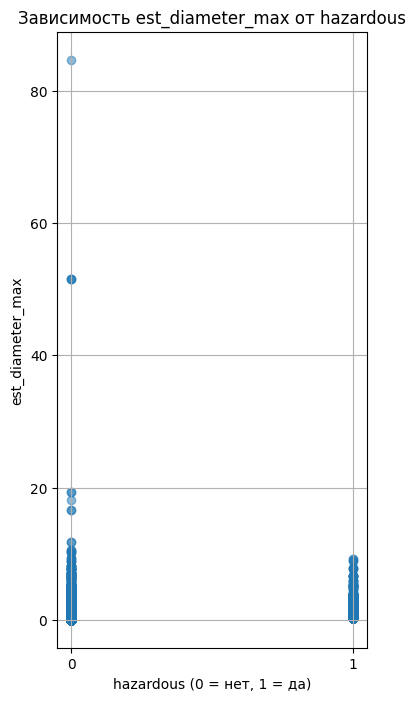

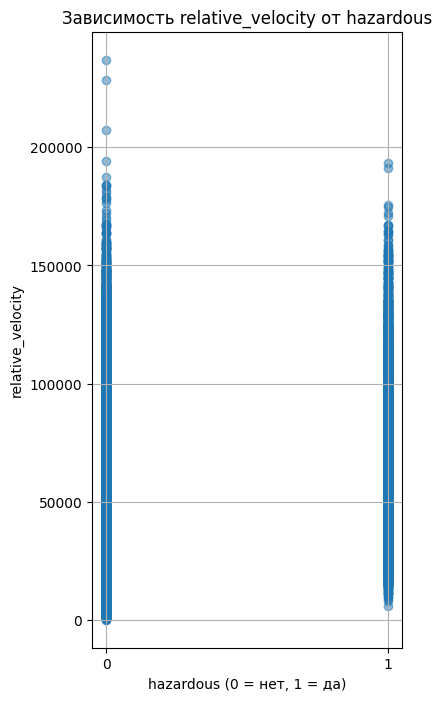

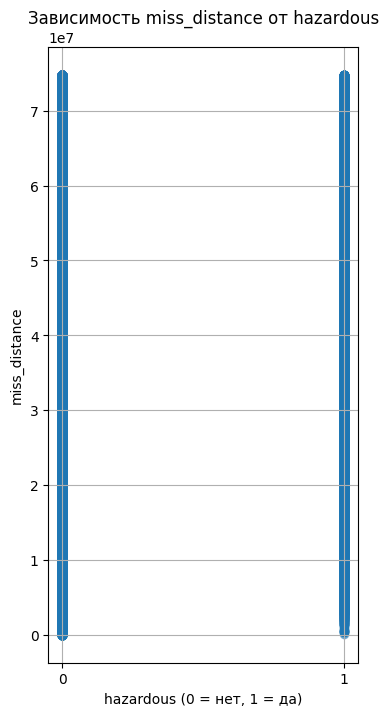

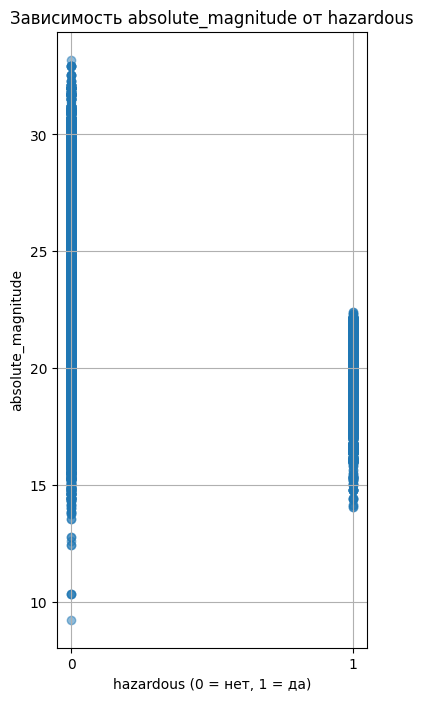

In [50]:
# Список числовых колонок, для которых строим графики, чтобы найти зависимости опасности от других колонок
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 8))  # Установка размера графика
    plt.scatter(df2['hazardous'], df2[column], alpha=0.5)  # Создаем диаграмму рассеяния
    plt.title(f'Зависимость {column} от hazardous')
    plt.xlabel('hazardous (0 = нет, 1 = да)')
    plt.ylabel(column)
    plt.xticks([0, 1])  # Установка меток по оси X
    plt.grid()  # Добавление сетки для удобства восприятия
    plt.show()  # Отображение графика

In [51]:
#Разбиение набора данных на обучающую, контрольную и тестовую выборки
def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

hazardous
False    81996
True      8840
Name: count, dtype: int64

Обучающая выборка:  (54501, 6)
hazardous
False    49197
True      5304
Name: count, dtype: int64


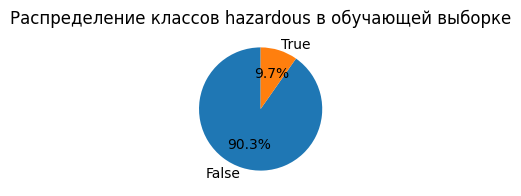

Контрольная выборка:  (18167, 6)
hazardous
False    16399
True      1768
Name: count, dtype: int64


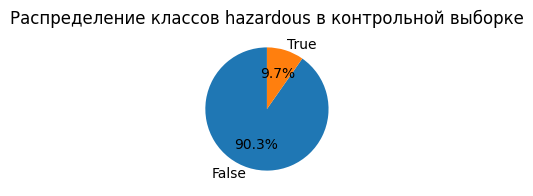

Тестовая выборка:  (18168, 6)
hazardous
False    16400
True      1768
Name: count, dtype: int64


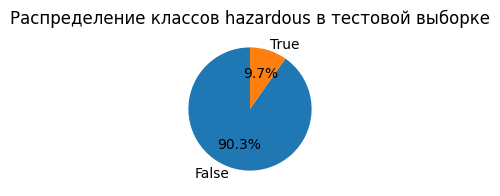

In [53]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df2.hazardous.value_counts())
print()


data = df2[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']].copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="hazardous", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.hazardous.value_counts())
hazardous_counts = df_train['hazardous'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов hazardous в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.hazardous.value_counts())
hazardous_counts = df_val['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.hazardous.value_counts())
hazardous_counts = df_test['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тестовой выборке')
plt.show()

Соотношение классов сильно смещено, это может привести к проблемам в обучении модели, так как модель будет обучаться в основном на одном классе. Стоит рассмотреть методы аугментации данных.

Обучающая выборка после oversampling:  (100631, 6)
hazardous
True     51434
False    49197
Name: count, dtype: int64


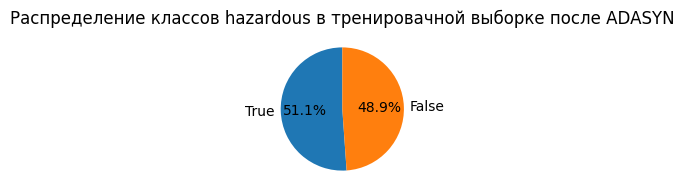

In [54]:
from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['hazardous'].value_counts())
hazardous_counts = df_train_adasyn['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировачной выборке после ADASYN')
plt.show()

Обучающая выборка после undersampling:  (10608, 6)
hazardous
False    5304
True     5304
Name: count, dtype: int64


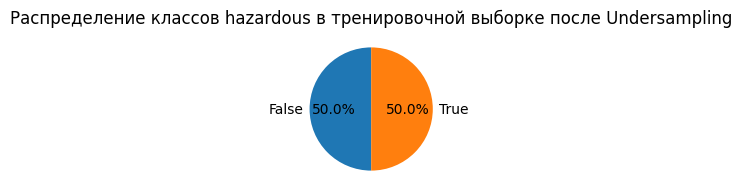

In [55]:
#андерсемплинг
rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['hazardous'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировочной выборке после Undersampling')
plt.show()

## Заработная плата рабочих мест в области Data Science	
https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary

Целью этого исследования является изучение факторов, влияющих на заработную плату специалистов по обработке данных. Для этого был использован набор данных, содержащий различные релевантные переменные. В этом отчёте описывается исследовательский анализ, проведённый для понимания взаимосвязи между этими факторами и заработной платой специалистов по обработке данных.

In [62]:
df3 = pd.read_csv("..//static//csv//ds_salaries.csv")

print(df3.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


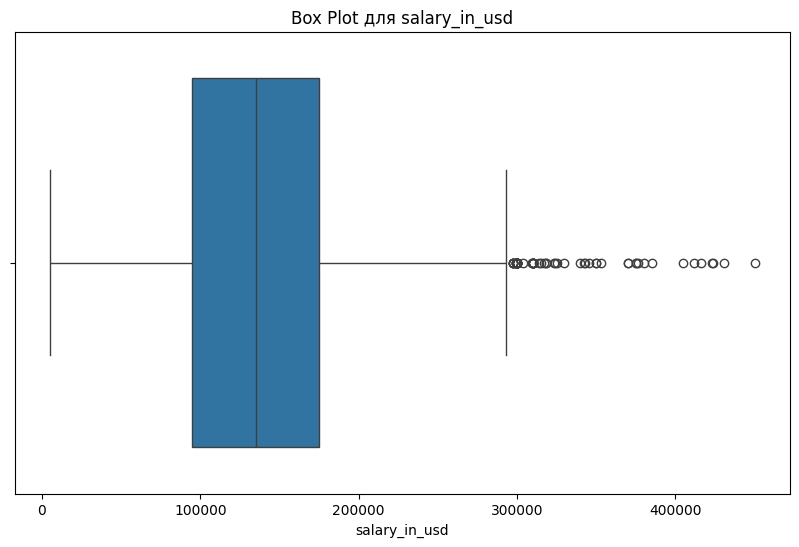

In [63]:
# Визуализация данных - ящик с усами. Выборка относительно сбалансирована, есть среднее смещение в среднюю сторону, медиана уравновешена
plt.figure(figsize=(10, 6))
sns.boxplot(x=df3["salary_in_usd"])
plt.title("Box Plot для salary_in_usd")
plt.xlabel("salary_in_usd")
plt.show()

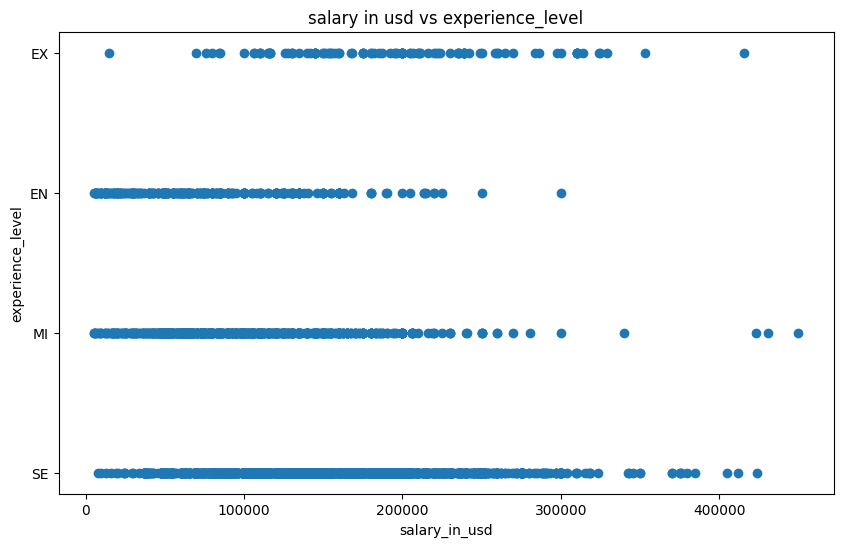

In [66]:
# Визуализируем отношение размера компании и зарплаты
plt.figure(figsize=(10, 6))
plt.scatter(df3["salary_in_usd"], df3["experience_level"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

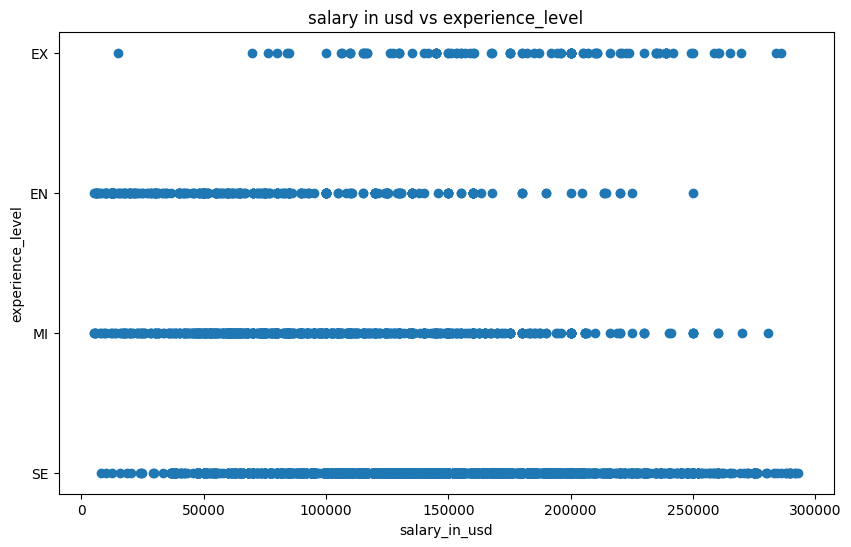

In [70]:

# Статистический анализ для определения выбросов
Q1 = df3["salary_in_usd"].quantile(0.25)
Q3 = df3["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df3["salary_in_usd"] < (Q1 - threshold)) | (
    df3["salary_in_usd"] > (Q3 + threshold)
)

# Обработка выбросов
# В данном случае мы уберем выбросы
median_salary = df3["salary_in_usd"].median()
df3.loc[outliers, "salary_in_usd"] = 0
df3 = df3[df3.salary_in_usd != 0]

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df3["salary_in_usd"], df3["experience_level"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

In [71]:
#Разбиение набора данных на обучающую, контрольную и тестовую выборки
# Загрузка данных
train_df = pd.read_csv("..//static//csv//train_data.csv")
val_df = pd.read_csv("..//static//csv//val_data.csv")
test_df = pd.read_csv("..//static//csv//test_data.csv")

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))


def check_balance(df3, name):
    counts = df3["salary_in_usd"].value_counts()
    print(f"Распределение salary_in_usd в {name}:")
    print(counts)
    print()


check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Размер обучающей выборки: 2214
Размер контрольной выборки: 739
Размер тестовой выборки: 739
Распределение salary_in_usd в обучающей выборке:
salary_in_usd
130000    60
150000    59
160000    56
100000    56
120000    52
          ..
83864      1
61467      1
152380     1
73742      1
110037     1
Name: count, Length: 741, dtype: int64

Распределение salary_in_usd в контрольной выборке:
salary_in_usd
100000    25
150000    20
140000    19
120000    16
135000    16
          ..
247500     1
128875     1
36000      1
121500     1
85847      1
Name: count, Length: 354, dtype: int64

Распределение salary_in_usd в тестовой выборке:
salary_in_usd
120000    23
150000    19
100000    18
160000    16
200000    13
          ..
75648      1
169200     1
198800     1
219535     1
172200     1
Name: count, Length: 364, dtype: int64



In [72]:
def oversample(df3):
    X = df3.drop("salary_in_usd", axis=1)
    y = df3["salary_in_usd"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)  # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение salary_in_usd в обучающей выборке после oversampling:
salary_in_usd
127221    60
105000    60
100000    60
260000    60
130000    60
          ..
113900    60
110000    60
129000    60
203000    60
200000    60
Name: count, Length: 741, dtype: int64

Распределение salary_in_usd в контрольной выборке после oversampling:
salary_in_usd
99050     25
126277    25
192500    25
194000    25
177600    25
          ..
140000    25
75000     25
165000    25
72914     25
252000    25
Name: count, Length: 354, dtype: int64

Распределение salary_in_usd в тестовой выборке после oversampling:
salary_in_usd
219000    23
143860    23
72500     23
140000    23
66837     23
          ..
109000    23
126000    23
70186     23
199000    23
60000     23
Name: count, Length: 364, dtype: int64

